# Introduction

In this Data Story there will be an investigation on if there is a relationship between the Human Development Index (HDI) and the Gender Sucide ratio. The HDI is an internationally used index to measure the quality of life of a person in a certain country. The quality of life can be described simply as how livable a country is for an average person living in a country. Variables of this index are, among other things, life expectancy, education, healthcare and gross national income per capita. Men commit on average 3,9 times more suicide than women worldwide, but this varies per country. We are specifically interested if a higher HDI leads to a more evenly distributed gender suicide ratio. We will also take a look at the Gender Development Index (GDI). The GDI measures the index of the equality between the HDI for men and women. So if the HDI for men and women is almost equal, then the GDI is close to 1. With this extra variable, we can also look if the GDI has a effect on the gender suicide ratio. This data story will explore three different perspectives.

- The first perspective is that the HDI and GDI have iflunece on the average suicides per country
- The second perspective we will look specifically at the suicides per gender
- The third perspective we will look at the geographical distribution of suicide rates based on GDI and HDI levels

With this Data Story, we hope to get a better insight in the relation between the development of a country, the development of gender and the suicide ratio.

# Preprocessing


Database 1 contains information about suicides in each country, as for men and women for every year between 1987 and 2016.  It would seem logical to filter for the year 2015, since this year is used in the other databases. However, the registered amount of countries for that year is only 62, which is why we have chosen to compare for the year 2013, which has 80 registered countries. The data that we are interested in (suicides/100k civilians) is categorized in a certain age group, year, and country. Male and female suicides are also separated. Based on these qualifications, two separate datasets are constructed, one male, and one female. The mean suicides/100k is then calculated for both datasets, and added as a column. Then, the male and female datasets are merged together into one, also including a male-female suicide ratio (suicides/100k male / suicides/100k female).

Database 2 contains data of 185 countries, revolved around the Human Development Index (HDI)  of each country, measured in 2015 specifically. The HDI is a value between 0 and 1 (low-high) that indicates human development by looking at health, education, and standard of living. The database contains each variable that is considered for the HDI value, but we are only interested in the HDI values themselves. Thus, as for preprocessing, all columns except the country and its HDI value are removed.

Database 3 is in terms of data-context identical to the first one, yet it revolves around the Gender Development Index (GDI), instead of the HDI. The GDI is also a value between 0 and 1 (low-high), that indicates equality in human development specifically between male and female. To clarify, the higher the gender equality, the higher the GDI value will be. Similarly to the preprocessing of database one, will all rows except the country and its GDI value be removed. Finally, dataset 2 and 3 are merged together based on their shared countries. Rows that include one or more ‘empty’ values are removed from the dataset.

Database 4 contains the HDI values for 189 countries for each year from 1990 to 2019. As we are interested specifically in the HDI values for each country from the year 2013 (based on the argumentation above in dataset 1, all other years are filtered out. This database is then merged with database 2 to form a separate dataset. This dataset will be used to prove why the HDI values of 2015 can be compared with the suicide statistics of 2013, as the difference between the HDI values of 2013 and 2015 are insignificant. 

Datasets 1-4 are finally merged into one based on their shared country, which results in a dataset with 70 countries.





# Visualizations

The chart compares the relationship between the HDI and the Suicide Ratio.  The x-axis represents the HDI. The scale ranges from 0.6 to 0.95 because all the values of the HDI lie between these values. The y-axis represents the Suicide Ratio. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart you can make out that the higher the HDI is, the lower the suicide ratio is.

The chart compares the relationship between the GDI and the Suicide Ratio. The x-axis represents the GDI. The scale ranges from 0.9 to 1.04 because all the values of the HDI lie between these values. The y-axis represents the Suicide Ratio. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart, there is a slight relation between the GDI and suicide ratio; the higher the GDI, the lower the suicide ratio. Though, this relationship is not at all strong.

The chart compares the relationship between the GII and the Suicide Ratio.  The x-axis represents the GII. The scale ranges from 0 to around 0.55, because all the values of the GII lie between these values. The y-axis represents the Suicide. It indicates the ratio of male/female suicides. The scale ranges from 0 to 20 so that all the data points can be shown. In this chart you can make out that the higher the GII is, the higher the suicide ratio is; the higher the inequality, the less the equality between male and female suicides. 

The chart compares the relationship between the GII and the Female Suicide. The x-axis represents the GII. The scale ranges from 0 to around 0.55, because all the values of the GII lie between these values. The y-axis represents the female suicide. It indicates the amount of female suicides. The scale ranges from 0 to 12 so that all the data points can be shown. In this chart you can make out that the higher the GII is, the lower the female suicide is.

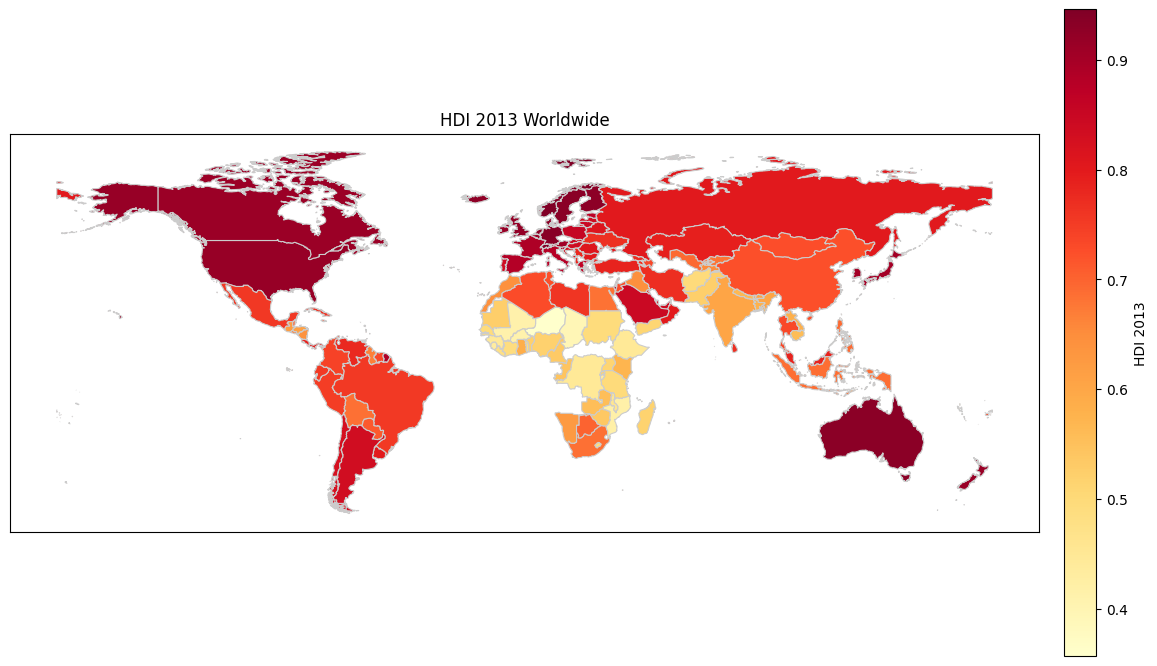

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/HDI_GDI_database_new.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Plot the choropleth map
fig, ax = plt.subplots(figsize=(16, 12))
merged_data.plot(column='HDI 2013', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
plt.title('HDI 2013 Worldwide')

# Step 7: Add a colorbar for 'HDI 2013'
sm = ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['HDI 2013'])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
cbar.set_label('HDI 2013')

# Remove the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])

# Display the map
plt.show()


This map shows the HDI in 2013 per country. As shown in the legend, the darker the shade of red, the higher the HDI is. In this map you can clearly see the more developed areas of the world in dark red, such as North America, Western Europe, Eastern Asia and Australia. You can also see the less developed parts of the world as a lighter orange/yellowish shade, Such as Africa, Latin-America and the middle east.

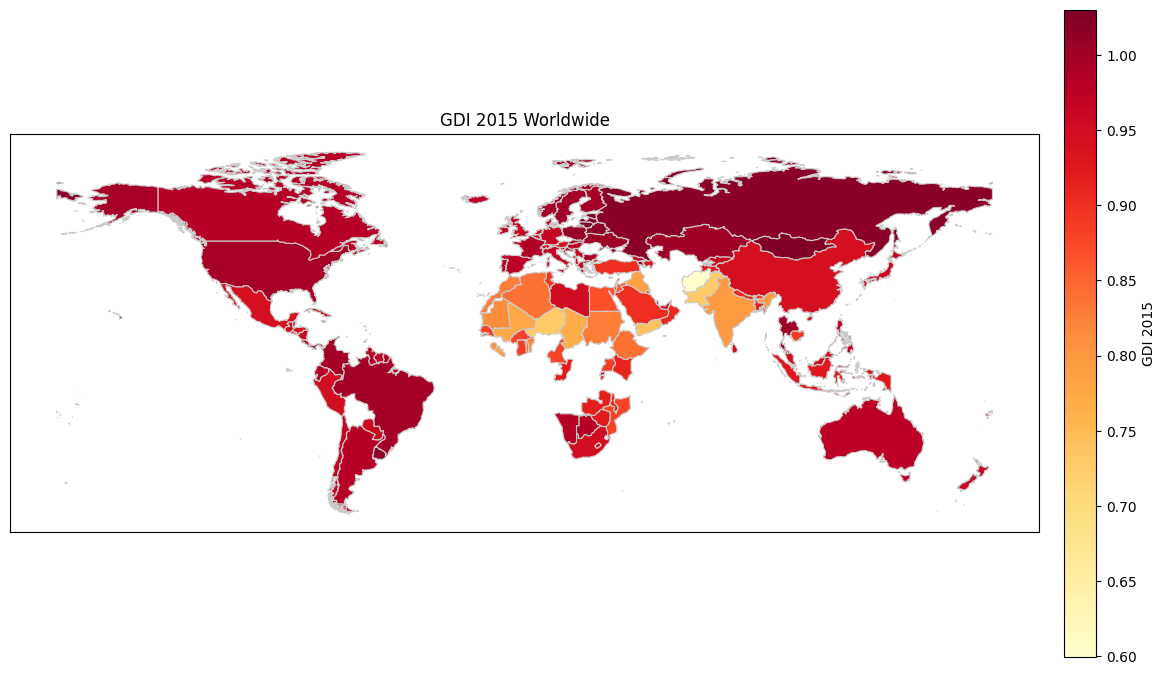

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/IV DATASET 1.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Plot the choropleth map
fig, ax = plt.subplots(figsize=(16, 12))
merged_data.plot(column='GDI 2015', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
plt.title('GDI 2015 Worldwide')

# Step 7: Add a colorbar for 'HDI 2013'
sm = ScalarMappable(cmap='YlOrRd')
sm.set_array(merged_data['GDI 2015'])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
cbar.set_label('GDI 2015')

# Remove the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])

# Display the map
plt.show()


This map shows the GDI in 2015 per country. As shown in the legend, the darker the shade of red, the higher the GDI is. In this map you can see that in most of the world the GDI is relatively high, but there are some parts in the world that have a relatively low GDI, such as India, Afganistan and central/north Africa.

In [1]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from ipywidgets import interact

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/HDI_GDI_database_new.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Define the function to update the map based on the selected index
def update_map(index):
    fig, ax = plt.subplots(figsize=(16, 12))
    column_name = 'HDI 2013' if index == 0 else 'GDI 2015'
    cmap_name = 'YlOrRd' if index == 0 else 'YlOrRd'
    title = 'HDI 2013 Worldwide' if index == 0 else 'GDI 2015 Worldwide'

    merged_data.plot(column=column_name, cmap=cmap_name, linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
    plt.title(title)

    # Add a colorbar for the selected column
    sm = ScalarMappable(cmap=cmap_name)
    sm.set_array(merged_data[column_name])
    cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
    cbar.set_label(column_name)

    # Remove the numbers on the axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Display the map
    plt.show()

# Use the interact function to create the interactive widget
interact(update_map, index=[('HDI', 0), ('GDI', 1)])


interactive(children=(Dropdown(description='index', options=(('HDI', 0), ('GDI', 1)), value=0), Output()), _do…

<function __main__.update_map(index)>

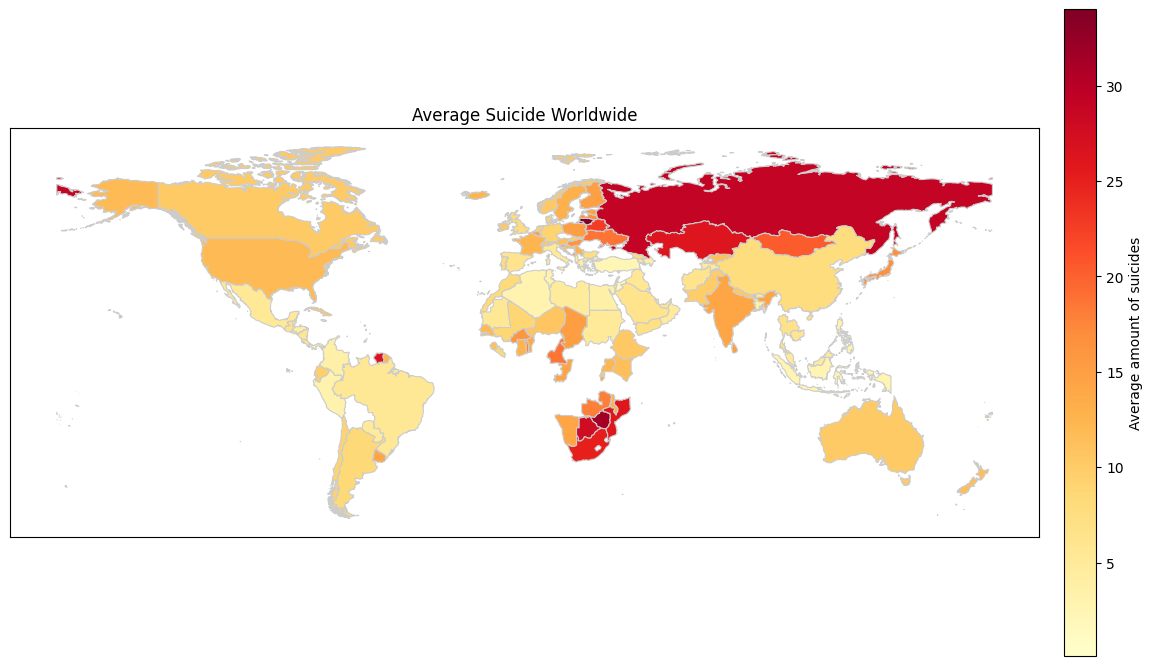

In [24]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/IV DATASET 1.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Remove outliers based on IQR
Q1 = merged_data['Average suicide 2013'].quantile(0.25)
Q3 = merged_data['Average suicide 2013'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = merged_data[
    (merged_data['Average suicide 2013'] >= lower_bound) &
    (merged_data['Average suicide 2013'] <= upper_bound)
]

# Step 7: Plot the choropleth map with filtered data
fig, ax = plt.subplots(figsize=(16, 12))
filtered_data.plot(column='Average suicide 2013', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
plt.title('Average Suicide Worldwide')

# Step 8: Add a colorbar for 'Suicides'
sm = ScalarMappable(cmap='YlOrRd')
sm.set_array(filtered_data['Average suicide 2013'])
cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
cbar.set_label('Average amount of suicides')

# Remove the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])

# Display the map
plt.show()


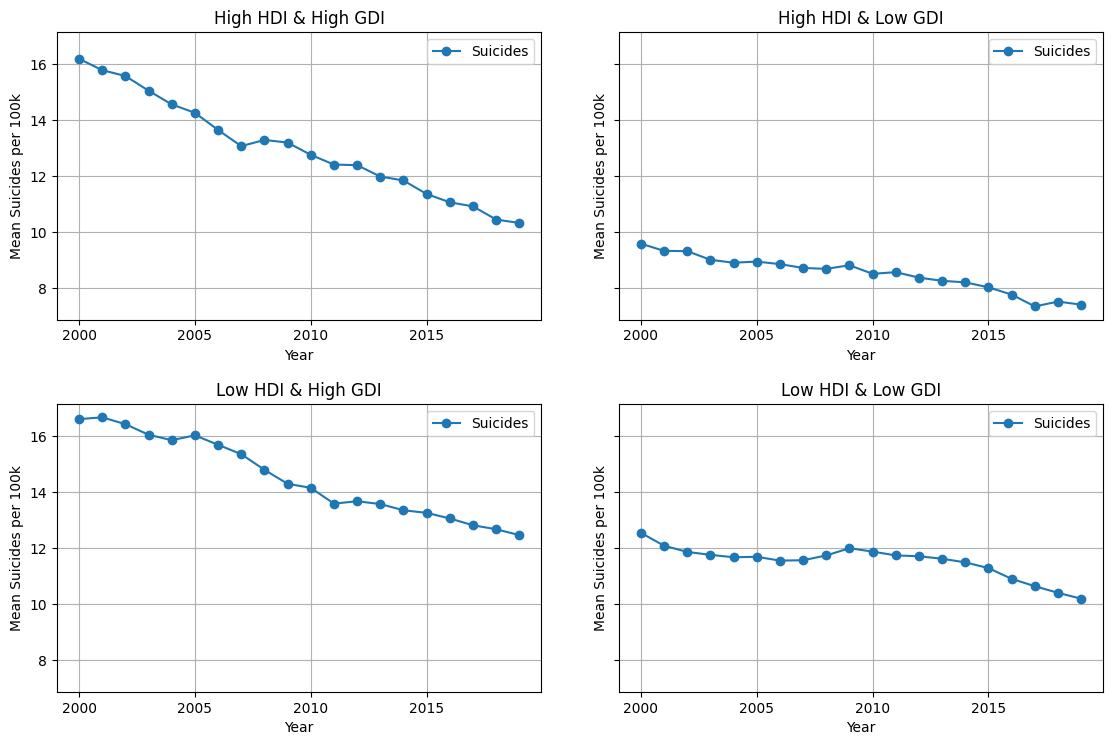

In [3]:
import mplcursors
# Read the dataset
df = pd.read_csv('databases/IV DATASET 2.csv')
df1 = pd.read_csv('databases/IV DATASET 1.csv')


df1['HDI Classification'] = df1['HDI 2013'].apply(lambda x: 'HD' if x >= 0.775 else 'LD')
df1['GDI Classification'] = df1['GDI 2015'].apply(lambda x: 'HD' if x >= 0.97 else 'LD')

data = pd.merge(df, df1, on='Country')
data = data[['Country', 'Year', 'Suicides/100k', 'HDI Classification', 'GDI Classification']].dropna()

# Separate the data into four groups: HH, HL, LH, LL
hh_df = data[(data['HDI Classification'] == 'HD') & (data['GDI Classification'] == 'HD')]
hl_df = data[(data['HDI Classification'] == 'HD') & (data['GDI Classification'] == 'LD')]
lh_df = data[(data['HDI Classification'] == 'LD') & (data['GDI Classification'] == 'HD')]
ll_df = data[(data['HDI Classification'] == 'LD') & (data['GDI Classification'] == 'LD')]

# Function to plot the line chart
def plot_line_chart(ax, data, title):
    years = data['Year'].unique()
    years.sort()
    suicides_mean = data.groupby('Year')['Suicides/100k'].mean()
    ax.plot(years, suicides_mean, marker='o', label='Suicides')

    ax.set_xlabel('Year')
    ax.set_ylabel('Mean Suicides per 100k')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    # Enable interactivity and hover-over data labels
    cursor = mplcursors.cursor(ax, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))

# Creating the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
fig.tight_layout(pad=4.0)

# Plotting the line charts for each category
plot_line_chart(axs[0, 0], hh_df, 'High HDI & High GDI')
plot_line_chart(axs[0, 1], hl_df, 'High HDI & Low GDI')
plot_line_chart(axs[1, 0], lh_df, 'Low HDI & High GDI')
plot_line_chart(axs[1, 1], ll_df, 'Low HDI & Low GDI')

# Adjusting x-axis tick spacing
for ax in axs.flat:
    ax.xaxis.set_major_locator(plt.MaxNLocator(len(ax.get_xticks()) // 2))

plt.show()


These graphs show the correlation between the mean suicides per 100.000 people, and the HDI & GDI, from the years 2000 to 2019. We speak of high HDI & GDI if the index number is 0.5 or higher. Everything lower than 0.5 is considered low. The graphs conclude that GDI has the most influence on the mean number of suicides, as shown by the clear difference in the graph 'High HDI & High GDI' and 'High HDI & Low GDI'.

Based on the visualization, it appears that there is a positive correlation between the GDI (Gender Development Index) and suicide ratios. This means that as the GDI increases, the suicide ratio tends to be higher.

One possible conclusion drawn from this observation is that gender-related factors, such as social and economic disparities, may play a significant role in influencing suicide rates. A higher GDI indicates a higher level of gender equality and development, suggesting that countries with greater gender parity may also experience increased societal pressures and expectations, particularly for both men and women.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from ipywidgets import interact

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/IV DATASET 1.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Remove outliers based on IQR
Q1 = merged_data['Average suicide 2013'].quantile(0.25)
Q3 = merged_data['Average suicide 2013'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = merged_data[
    (merged_data['Average suicide 2013'] >= lower_bound) &
    (merged_data['Average suicide 2013'] <= upper_bound)
]

# Define the function to update the map based on the selected index
def update_map(index):
    fig, ax = plt.subplots(figsize=(16, 12))
    column_name = 'Average suicide 2013'
    cmap_name = 'YlOrRd'
    title = 'Average Suicides/100k Worldwide'

    if index == 1:
        column_name = 'HDI 2013'
        cmap_name = 'YlOrRd'
        title = 'HDI 2013 Worldwide'

    filtered_data.plot(column=column_name, cmap=cmap_name, linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
    plt.title(title)

    # Add a colorbar for the selected column
    sm = ScalarMappable(cmap=cmap_name)
    sm.set_array(filtered_data[column_name])
    cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
    cbar.set_label(column_name)

    # Remove the numbers on the axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Display the map
    plt.show()

# Use the interact function to create the interactive widget
interact(update_map, index=[('Average Suicides/100k', 0), ('HDI', 1)])


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.update_map(index)>

# Visualization HDI, GDI & Suicide

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from ipywidgets import interact

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/FINAL DATASET.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Remove outliers based on IQR
Q1 = merged_data['Average suicide 2015'].quantile(0.25)
Q3 = merged_data['Average suicide 2015'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = merged_data[
    (merged_data['Average suicide 2015'] >= lower_bound) &
    (merged_data['Average suicide 2015'] <= upper_bound)
]

# Define the function to update the map based on the selected index
def update_map(index):
    fig, ax = plt.subplots(figsize=(16, 12))
    
    if index == 0:
        column_name = 'HDI 2015'
        cmap_name = 'YlOrRd'
        title = 'HDI 2015 Worldwide'
    
    if index == 1:
        column_name = 'GDI 2015'
        cmap_name = 'YlOrRd'
        title = 'GDI 2015 Worldwide'
    
    if index == 2:
        column_name = 'Average suicide 2015'
        cmap_name = 'YlOrRd'
        title = 'Average Suicides/100k Worldwide, 2015'
    

    filtered_data.plot(column=column_name, cmap=cmap_name, linewidth=0.8, edgecolor='0.8', legend=False, ax=ax)
    plt.title(title)

    # Add a colorbar for the selected column
    sm = ScalarMappable(cmap=cmap_name)
    sm.set_array(filtered_data[column_name])
    cbar = plt.colorbar(sm, orientation='vertical', pad=0.02, shrink=0.7, ax=ax)
    cbar.set_label(column_name)

    # Remove the numbers on the axes
    ax.set_xticks([])
    ax.set_yticks([])

    # Display the map
    plt.show()

# Use the interact function to create the interactive widget
interact(update_map, index=[('HDI', 0), ('GDI', 1), ('Average Suicides/100k', 2)])


DriverError: countries_map/countries.shp: No such file or directory

# Hier komt perspectief 2 ofz a oulleh

In [2]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
from ipywidgets import interact

# Step 3: Load the shapefile or GeoJSON file
shapefile_path = 'countries_map/countries.shp'
shapefile_data = gpd.read_file(shapefile_path)

# Step 4: Load the CSV data
csv_file_path = 'databases/FINAL DATASET.csv'
csv_data = pd.read_csv(csv_file_path)

# Renaming Countries in shapefile data that they match to our .csv file
shapefile_data.loc[shapefile_data['NAME'] == 'United States of America', 'NAME'] = 'United States'
shapefile_data.loc[shapefile_data['NAME'] == 'Russia', 'NAME'] = 'Russian Federation'
shapefile_data.loc[shapefile_data['NAME'] == 'Dem. Rep. Congo', 'NAME'] = 'Congo (Democratic Republic of the)'
shapefile_data.loc[shapefile_data['NAME'] == 'Iran', 'NAME'] = 'Iran (Islamic Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Tanzania', 'NAME'] = 'Tanzania (United Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'South Korea', 'NAME'] = 'Korea (Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Bolivia', 'NAME'] = 'Bolivia (Plurinational State of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Venezuela', 'NAME'] = 'Venezuela (Bolivarian Republic of)'
shapefile_data.loc[shapefile_data['NAME'] == 'Laos', 'NAME'] = "Lao People's Democratic Republic"

# Step 5: Merge shapefile data with CSV data using country names
merged_data = shapefile_data.merge(csv_data, left_on='NAME', right_on='Country', how='left')

# Step 6: Remove outliers based on IQR
Q1 = merged_data['Average suicide 2015'].quantile(0.25)
Q3 = merged_data['Average suicide 2015'].quantile(0.90)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_data = merged_data[
    (merged_data['Average suicide 2015'] >= lower_bound) &
    (merged_data['Average suicide 2015'] <= upper_bound)
]

# Define the function to update the map based on the selected index
def update_map(index):
    if index == 0:
        column_name = 'HDI 2015'
        title = 'HDI 2015 Worldwide'
    elif index == 1:
        column_name = 'GDI 2015'
        title = 'GDI 2015 Worldwide'
    elif index == 2:
        column_name = 'Average suicide 2015'
        title = 'Average Suicides/100k Worldwide, 2015'
    
    fig = px.choropleth(
        filtered_data,
        geojson=filtered_data.geometry,
        locations=filtered_data.index,
        color=column_name,
        color_continuous_scale='YlOrRd',
        range_color=(filtered_data[column_name].min(), filtered_data[column_name].max()),
        projection="natural earth"
    )
    
    fig.update_layout(
        title=title,
        coloraxis_colorbar=dict(
            title=column_name,
            len=0.8,
            thickness=20,
            ypad=0,
            yanchor="top",
            ticks="outside",
            tickvals=[filtered_data[column_name].min(), filtered_data[column_name].max()],
            ticktext=[str(filtered_data[column_name].min()), str(filtered_data[column_name].max())]
        ),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type="natural earth"
        )
    )

    fig.show()

# Use the interact function to create the interactive widget
interact(update_map, index=[('HDI', 0), ('GDI', 1), ('Average Suicides/100k', 2)])

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


<function __main__.update_map(index)>